# Regression using a Neural Network (Pytorch)
Purpose

	•	Objective: Predict the median_house_value in California using a Multi-Layer Perceptron (MLP) regression model.
	•	Input Features: Variables such as median_income, longitude, latitude, and others from a dataset named housing.csv.
	•	Output: A predicted median_house_value based on the provided features.
Tech Stack

	•	Programming Language: Python
	•	Libraries:
	•	PyTorch: For building and training the neural network model.
	•	Pandas: For data handling and preprocessing.
	•	NumPy: For numerical operations.
	•	Matplotlib: For data visualization.
	•	Dataset: A CSV file named housing.csv.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
housing = pd.read_csv("housing.csv")
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
housing.shape

(20640, 10)

### Data pre-processing: remove NaN

In [4]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [5]:
# there are 207 NaN in the column 'total_bedrooms', remove them
# check housing again using housing.isnull().sum()
housing['total_bedrooms'].fillna((housing['total_bedrooms'].mean()), inplace=True)
housing.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

### Data pre-processing: Convert categorical data to numerical data - "ocean_proximity"

In [6]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [7]:
#We can use one-hot encoding method by calling pd.get_dummies
categorical_columns=['ocean_proximity'] # must be a list
housing = pd.get_dummies(housing, columns=categorical_columns)
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


### Visualize the data

Text(0.5, 1.0, 'median_income')

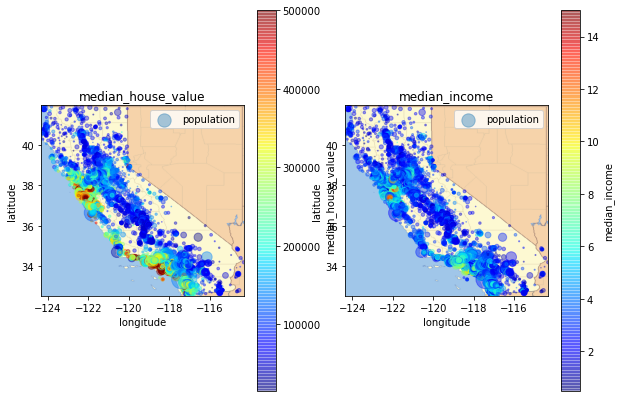

In [8]:
from skimage.io import imread
california_img = imread('california.png')
x1 = min(housing["longitude"].values)
x2 = max(housing["longitude"].values)
y1 = min(housing["latitude"].values)
y2 = max(housing["latitude"].values)
#---------------------------------------------
# the parameter c refers to color
# thus, median_house_value is color-coded in the left plot
fig, ax =plt.subplots(1,2)
housing.plot(ax=ax[0], kind="scatter", x="longitude", y="latitude",
             s=housing['population']/100, label="population",
             c="median_house_value", cmap=plt.get_cmap("jet"),
             colorbar=True, alpha=0.4, figsize=(10,7))
#---------------------------------------------
# the parameter c refers to color
# thus, median_income is color-coded in the right plot
ax[0].imshow(california_img,extent=[x1,x2,y1,y2])
ax[0].set_title('median_house_value')
housing.plot(ax=ax[1], kind="scatter", x="longitude", y="latitude",
             s=housing['population']/100, label="population",
             c="median_income", cmap=plt.get_cmap("jet"),
             colorbar=True, alpha=0.4, figsize=(10,7))
ax[1].imshow(california_img,extent=[x1,x2,y1,y2])
ax[1].set_title('median_income')

### Prepare the Training and Testing Datasets

In [9]:
X=housing.drop(['median_house_value'], axis=1)
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,0,0,0,1,0


In [10]:
Y=housing['median_house_value']
Y.head()

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64

In [11]:
# convert pandas dataframe/series to numpy array
# sklearn functions may not work well with pandas data types
X_columns=X.columns #store the column names
X=X.values.astype('float32')
Y=Y.values.astype('float32')

### trainnig, validation, testing split

In [12]:
#trainnig, validation, testing split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
#split X_train and Y_train into a 'pure' training set and a validation set
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=0)
print('train:', X_train.shape, Y_train.shape)
print('validation:', X_val.shape, Y_val.shape)
print('test:', X_test.shape, Y_test.shape)

train: (14860, 13) (14860,)
validation: (1652, 13) (1652,)
test: (4128, 13) (4128,)


In [13]:
#apply feature normalization to training, validation and test sets
from sklearn.preprocessing import MinMaxScaler
scalerX=MinMaxScaler()
scalerX.fit(X_train) # think about why fit to X_train, not X ?
X_train=scalerX.transform(X_train)
X_val=scalerX.transform(X_val)
X_test=scalerX.transform(X_test)

In [14]:
X_train[0]

array([0.5786848 , 0.38044596, 0.19607843, 0.12570114, 0.13671634,
       0.00983827, 0.02795593, 0.11055019, 0.        , 1.        ,
       0.        , 0.        , 0.        ], dtype=float32)

In [15]:
#normalize the output to facilitate convergence
Y_train_max=Y_train.max()
Y_train/=Y_train_max
Y_val/=Y_train_max
Y_test/=Y_train_max

### use LinearRegression as the baseline model

In [16]:
#step1:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression(fit_intercept=True)

In [17]:
#step2:
linear_model.fit(X_train, Y_train)

LinearRegression()

In [18]:
linear_model.coef_

array([-0.5266764 , -0.47057727,  0.11070023, -0.31356588,  0.8725244 ,
       -2.8026865 ,  1.009017  ,  1.1304905 , -0.0472497 , -0.12498007,
        0.26538375, -0.05612918, -0.03702435], dtype=float32)

In [19]:
linear_model.intercept_

0.5496546

Evaluate model on testing set
MSE= 0.018863905
MAE= 0.09931181
MAPE= 0.28951442


Text(0, 0.5, 'Y_test_pred')

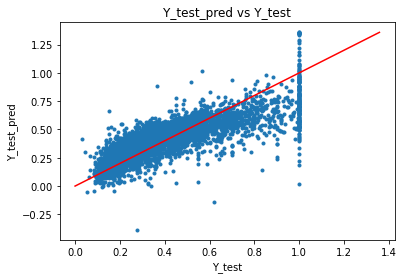

In [20]:
#step3:
Y_train_pred = linear_model.predict(X_train)
Y_test_pred = linear_model.predict(X_test)
print('Evaluate model on testing set')
MSE = np.mean((Y_test - Y_test_pred)**2)
MAE = np.mean(np.abs(Y_test - Y_test_pred))
MAPE =  np.mean(np.abs(Y_test - Y_test_pred)/Y_test)
print('MSE=', MSE)
print('MAE=', MAE)
print('MAPE=', MAPE)
#step6: 
# the red line is the 45-degree line
fig, ax = plt.subplots()
ax.set_title('Y_test_pred vs Y_test')
ax.plot(Y_test, Y_test_pred, '.')
ymax=np.max([Y_test.max(), Y_test_pred.max()])
ax.plot(np.linspace(0,ymax, 3), np.linspace(0, ymax, 3), '-r')
ax.set_xlabel('Y_test')
ax.set_ylabel('Y_test_pred')

#### define a dataset to hold/represent the data

In [21]:
#I give you the code here, because it is tricky
import torch
import torch.utils.data as Data
from torch.utils.data import Dataset as torch_dataset
class MyDataset(torch_dataset):
    def __init__(self, X, Y):
        self.X=X
        self.Y=Y.reshape(-1, 1) #this is very important
    def __len__(self):
        #return the number of data points
        return self.X.shape[0]
    def __getitem__(self, idx):        
        # use the notation DatasetName[idx]
        # to get a data point (x,y) by idx
        # we need to convert numpy array to torch tensor
        x=torch.tensor(self.X[idx], dtype=torch.float32)
        y=torch.tensor(self.Y[idx], dtype=torch.float32)
        return x, y
    def CreatDataset(self):
        X_temp = torch.from_numpy(self.X).float()
        Y_temp = torch.from_numpy(self.Y).float()
        dataset = Data.TensorDataset(X_temp, Y_temp)
        return dataset

Create instance objects of the `MyDataset` class <br>
a training dataset `dataset_train` <br>
a validation dataset `dataset_val` <br>
a testing dataset `dataset_test` <br>

In [22]:
dataset_train = MyDataset(X_train, Y_train).CreatDataset()
dataset_val = MyDataset(X_val, Y_val).CreatDataset()
dataset_test = MyDataset(X_test, Y_test).CreatDataset()
len(dataset_train)

14860

create dataloaders which will be used to generate minibatches <br>
batch_size=N means each minibatch contains N data points  <br>
note: the last minibatch may contain less than N data points

In [23]:
batch_size=128
# Data loader
dataloader_train = torch.utils.data.DataLoader(dataset=dataset_train,
                                           batch_size=batch_size,
                                           shuffle=True)
dataloader_val = torch.utils.data.DataLoader(dataset=dataset_val,
                                          batch_size=batch_size,
                                          shuffle=False)
dataloader_test = torch.utils.data.DataLoader(dataset=dataset_test,
                                          batch_size=batch_size,
                                          shuffle=False)

In [24]:
len(dataloader_train) # get the number of minibatches

117

In [25]:
#verify the shape of each tensor in a batch
for batch_idx, (X, Y) in enumerate(dataloader_train):
    print(batch_idx, X.size(), Y.size())

0 torch.Size([128, 13]) torch.Size([128, 1])
1 torch.Size([128, 13]) torch.Size([128, 1])
2 torch.Size([128, 13]) torch.Size([128, 1])
3 torch.Size([128, 13]) torch.Size([128, 1])
4 torch.Size([128, 13]) torch.Size([128, 1])
5 torch.Size([128, 13]) torch.Size([128, 1])
6 torch.Size([128, 13]) torch.Size([128, 1])
7 torch.Size([128, 13]) torch.Size([128, 1])
8 torch.Size([128, 13]) torch.Size([128, 1])
9 torch.Size([128, 13]) torch.Size([128, 1])
10 torch.Size([128, 13]) torch.Size([128, 1])
11 torch.Size([128, 13]) torch.Size([128, 1])
12 torch.Size([128, 13]) torch.Size([128, 1])
13 torch.Size([128, 13]) torch.Size([128, 1])
14 torch.Size([128, 13]) torch.Size([128, 1])
15 torch.Size([128, 13]) torch.Size([128, 1])
16 torch.Size([128, 13]) torch.Size([128, 1])
17 torch.Size([128, 13]) torch.Size([128, 1])
18 torch.Size([128, 13]) torch.Size([128, 1])
19 torch.Size([128, 13]) torch.Size([128, 1])
20 torch.Size([128, 13]) torch.Size([128, 1])
21 torch.Size([128, 13]) torch.Size([128, 1]

#### Build a neural network that has many hidden layers and nonlinear activation - softplus

In [26]:
import torch.nn as nn
import torch.nn.functional as F

class Net(torch.nn.Module):
    def __init__(self):
        super(Net,self).__init__()    
        self.fc1 = torch.nn.Linear(13,128)
        self.fc2 = torch.nn.Linear(128,128) 
        self.fc3 = torch.nn.Linear(128,1)
        
    def forward(self,x):
        dout = F.softplus(self.fc1(x)) 
        dout = F.softplus(self.fc2(dout))
        dout = self.fc3(dout)
        return dout

create an instance object of the class

In [27]:
net = Net()
print(net)

Net(
  (fc1): Linear(in_features=13, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=1, bias=True)
)


In [28]:
#move the model to GPU if you have a GPU

define a function to train the neural network in one epoch

create an optimizer (e.g. Adam) and send the parameters of the model to the optimizer

In [29]:
# create an optimizer (e.g. Adam) and send the parameters of the model to the optimizer
optimizer = torch.optim.Adam(net.parameters(), lr=0.001)
lossfunc = torch.nn.MSELoss()

def train(epoch, model):
    train_loss = 0.0
    for data,target in dataloader_train:
        optimizer.zero_grad()   
        output = model(data)    
        loss = lossfunc(output,target)  
        loss.backward()         
        optimizer.step()
        train_loss += loss.item()*data.size(0)

    train_loss = train_loss / len(dataloader_train.dataset)
    print('Epoch:  {}  Training Loss: {:.6f}'.format(epoch, train_loss))
    return train_loss

define a function to evaluate the neural network on the validation set or the testing set

In [30]:
def evaluate(epoch, model, data_loader):
    test_loss = 0.0
    with torch.no_grad(): 
        for data in data_loader:
            images, labels = data
            Yp = model(images)
            loss = lossfunc(Yp,labels)
            test_loss += loss.item()*images.size(0)
        test_loss = test_loss / len(data_loader.dataset)
    print('Epoch:  {}  Validation loss: {:.6f}'.format(epoch, test_loss))
    return test_loss

train the neural network model for many epochs <br>
It may need 100 epochs to converge.
So, we will not save any model to harddrive 

In [31]:
train_loss_dict = []
test_loss_dict = []
for epoch in range(100):
        train_loss = train(epoch, net)
        test_loss = evaluate(epoch, net, dataloader_val)
        train_loss_dict.append(train_loss)
        test_loss_dict.append(test_loss)

Epoch:  0  Training Loss: 0.046763
Epoch:  0  Validation loss: 0.036108
Epoch:  1  Training Loss: 0.032702
Epoch:  1  Validation loss: 0.029129
Epoch:  2  Training Loss: 0.025061
Epoch:  2  Validation loss: 0.034183
Epoch:  3  Training Loss: 0.022356
Epoch:  3  Validation loss: 0.023033
Epoch:  4  Training Loss: 0.021837
Epoch:  4  Validation loss: 0.024094
Epoch:  5  Training Loss: 0.021840
Epoch:  5  Validation loss: 0.032109
Epoch:  6  Training Loss: 0.021539
Epoch:  6  Validation loss: 0.021859
Epoch:  7  Training Loss: 0.020636
Epoch:  7  Validation loss: 0.022457
Epoch:  8  Training Loss: 0.021266
Epoch:  8  Validation loss: 0.021548
Epoch:  9  Training Loss: 0.020552
Epoch:  9  Validation loss: 0.021447
Epoch:  10  Training Loss: 0.020369
Epoch:  10  Validation loss: 0.022063
Epoch:  11  Training Loss: 0.020231
Epoch:  11  Validation loss: 0.023560
Epoch:  12  Training Loss: 0.020277
Epoch:  12  Validation loss: 0.025074
Epoch:  13  Training Loss: 0.020400
Epoch:  13  Validation

plot the loss vs epoch curve

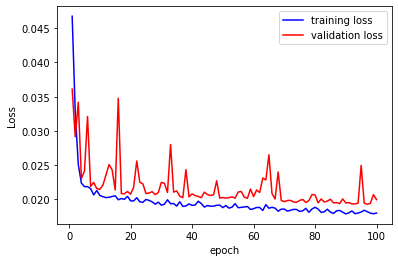

In [32]:
epochs = range(1,101)
plt.plot(epochs, train_loss_dict, 'b', label='training loss')
plt.plot(epochs, test_loss_dict, 'r', label='validation loss')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [33]:
# obtain Yp_test
# "Yp_test=model(X_test)"  may need lots of memory
# we can use a for loop to get Yp_test, see the function test
Yp_test=[]
with torch.no_grad(): # tell Pytorch not to build graph in the 'with' section
    for batch_idx, (X, Y) in enumerate(dataloader_test):
        X, Y = X, Y
        Yp = net(X)#forward pass
        Yp_test.append(Yp.detach().cpu().numpy())
Yp_test=np.concatenate(Yp_test, axis=0).squeeze()

In [34]:
# compute MSE, MAE and MAPE on test set
print("Evaluate model on testing set")
MSE = np.mean((Y_test - Yp_test)**2)
MAE = np.mean(np.abs(Y_test - Yp_test))
MAPE =  np.mean(np.abs(Y_test - Yp_test)/Y_test)
print('MSE=', MSE)
print('MAE=', MAE)
print('MAPE=', MAPE)

Evaluate model on testing set
MSE= 0.018229807
MAE= 0.09317047
MAPE= 0.24658243


Text(0, 0.5, 'Yp_test')

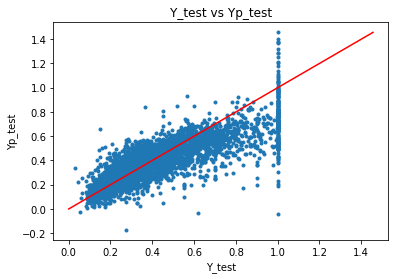

In [35]:
# plot Yp_test vs Y_test
# the red line is the 45-degree line
fig, ax = plt.subplots()
ax.set_title('Y_test vs Yp_test')
ax.plot(Y_test, Yp_test, '.')
ymax=np.max([Y_test.max(), Yp_test.max()])
ax.plot(np.linspace(0,ymax, 3), np.linspace(0, ymax, 3), '-r')
ax.set_xlabel('Y_test')
ax.set_ylabel('Yp_test')

### change the structure of the MLP model and see if it can do better than XGBoost

In [36]:
#define a new model
#train, validate and test the model
#compare it with XGBoost in homework #3
class Net(torch.nn.Module):
    def __init__(self):
        super(Net,self).__init__()    
        self.fc1 = torch.nn.Linear(13,256)
        self.fc2 = torch.nn.Linear(256,256) 
        self.fc3 = torch.nn.Linear(256,256) 
        self.fc4 = torch.nn.Linear(256,1)
        
    def forward(self,x):
        dout = F.softplus(self.fc1(x)) 
        dout = F.softplus(self.fc2(dout))
        dout = F.softplus(self.fc3(dout))
        dout = self.fc4(dout)
        return dout
    
net = Net()
print(net)

# create an optimizer (e.g. Adam) and send the parameters of the model to the optimizer
optimizer = torch.optim.Adam(net.parameters(), lr=0.001)
lossfunc = torch.nn.MSELoss()

for epoch in range(300):
        train_loss = train(epoch, net)
        test_loss = evaluate(epoch, net, dataloader_val)

Net(
  (fc1): Linear(in_features=13, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=256, bias=True)
  (fc4): Linear(in_features=256, out_features=1, bias=True)
)
Epoch:  0  Training Loss: 0.080930
Epoch:  0  Validation loss: 0.048525
Epoch:  1  Training Loss: 0.041635
Epoch:  1  Validation loss: 0.036168
Epoch:  2  Training Loss: 0.033872
Epoch:  2  Validation loss: 0.028940
Epoch:  3  Training Loss: 0.024088
Epoch:  3  Validation loss: 0.031438
Epoch:  4  Training Loss: 0.022188
Epoch:  4  Validation loss: 0.021957
Epoch:  5  Training Loss: 0.022038
Epoch:  5  Validation loss: 0.022036
Epoch:  6  Training Loss: 0.021184
Epoch:  6  Validation loss: 0.031006
Epoch:  7  Training Loss: 0.021386
Epoch:  7  Validation loss: 0.021631
Epoch:  8  Training Loss: 0.021118
Epoch:  8  Validation loss: 0.022141
Epoch:  9  Training Loss: 0.021062
Epoch:  9  Validation loss: 0.024902
Epoch:  10  Training Loss: 0

Epoch:  108  Training Loss: 0.015562
Epoch:  108  Validation loss: 0.017653
Epoch:  109  Training Loss: 0.015323
Epoch:  109  Validation loss: 0.017512
Epoch:  110  Training Loss: 0.015357
Epoch:  110  Validation loss: 0.017987
Epoch:  111  Training Loss: 0.015641
Epoch:  111  Validation loss: 0.017193
Epoch:  112  Training Loss: 0.016198
Epoch:  112  Validation loss: 0.018642
Epoch:  113  Training Loss: 0.015561
Epoch:  113  Validation loss: 0.017284
Epoch:  114  Training Loss: 0.015420
Epoch:  114  Validation loss: 0.017036
Epoch:  115  Training Loss: 0.015301
Epoch:  115  Validation loss: 0.017197
Epoch:  116  Training Loss: 0.015241
Epoch:  116  Validation loss: 0.018061
Epoch:  117  Training Loss: 0.015369
Epoch:  117  Validation loss: 0.018305
Epoch:  118  Training Loss: 0.015418
Epoch:  118  Validation loss: 0.016994
Epoch:  119  Training Loss: 0.015214
Epoch:  119  Validation loss: 0.017245
Epoch:  120  Training Loss: 0.015402
Epoch:  120  Validation loss: 0.017728
Epoch:  121 

Epoch:  216  Training Loss: 0.013945
Epoch:  216  Validation loss: 0.015507
Epoch:  217  Training Loss: 0.014070
Epoch:  217  Validation loss: 0.015579
Epoch:  218  Training Loss: 0.014035
Epoch:  218  Validation loss: 0.015481
Epoch:  219  Training Loss: 0.013973
Epoch:  219  Validation loss: 0.016681
Epoch:  220  Training Loss: 0.014178
Epoch:  220  Validation loss: 0.016002
Epoch:  221  Training Loss: 0.013905
Epoch:  221  Validation loss: 0.016204
Epoch:  222  Training Loss: 0.013971
Epoch:  222  Validation loss: 0.015553
Epoch:  223  Training Loss: 0.013682
Epoch:  223  Validation loss: 0.016065
Epoch:  224  Training Loss: 0.014481
Epoch:  224  Validation loss: 0.015399
Epoch:  225  Training Loss: 0.013769
Epoch:  225  Validation loss: 0.015460
Epoch:  226  Training Loss: 0.014159
Epoch:  226  Validation loss: 0.015491
Epoch:  227  Training Loss: 0.013840
Epoch:  227  Validation loss: 0.015348
Epoch:  228  Training Loss: 0.013871
Epoch:  228  Validation loss: 0.015209
Epoch:  229 

In [37]:
Yp_test=[]
with torch.no_grad(): # tell Pytorch not to build graph in the 'with' section
    for batch_idx, (X, Y) in enumerate(dataloader_test):
        X, Y = X, Y
        Yp = net(X)#forward pass
        Yp_test.append(Yp.detach().cpu().numpy())
Yp_test=np.concatenate(Yp_test, axis=0).squeeze()

print("Evaluate model on testing set")
MSE = np.mean((Y_test - Yp_test)**2)
MAE = np.mean(np.abs(Y_test - Yp_test))
MAPE =  np.mean(np.abs(Y_test - Yp_test)/Y_test)
print('MSE=', MSE)
print('MAE=', MAE)
print('MAPE=', MAPE)

Evaluate model on testing set
MSE= 0.013930111
MAE= 0.0860067
MAPE= 0.26941463


compare MLP model with XGBoost, XGBRegressor is slightly better than MLP model.